In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt


train_df = pd.read_csv("cure_the_princess_train.csv")
test_df = pd.read_csv("cure_the_princess_test.csv")
val_df = pd.read_csv("cure_the_princess_validation.csv")


train_inputs, train_targets = torch.tensor(train_df.drop("Cured", axis=1).values, dtype=torch.float32), torch.tensor(train_df["Cured"].values, dtype=torch.float32)
test_inputs, test_targets = torch.tensor(test_df.drop("Cured", axis=1).values, dtype=torch.float32), torch.tensor(test_df["Cured"].values, dtype=torch.float32)
val_inputs, val_targets = torch.tensor(val_df.drop("Cured", axis=1).values, dtype=torch.float32), torch.tensor(val_df["Cured"].values, dtype=torch.float32)


class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(13, 100)
        self.hidden2 = nn.Linear(100, 50)
        self.out = nn.Linear(50, 1)

    def forward(self, x):
        x = nn.functional.relu(self.hidden1(x))
        x = nn.functional.relu(self.hidden2(x))
        x = torch.sigmoid(self.out(x))
        return x


model = MLP()
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.BCELoss()
torch.manual_seed(190401027)


train_losses, val_losses = [], []
num_epochs = 1000
batch_size = 16

for epoch in range(num_epochs):
    for i in range(0, len(train_inputs), batch_size):
        batch_inputs = train_inputs[i:i+batch_size]
        batch_targets = train_targets[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(batch_inputs).squeeze()
        loss = criterion(outputs, batch_targets)
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        train_outputs = model(train_inputs).squeeze()
        train_loss = criterion(train_outputs, train_targets)
        train_losses.append(train_loss.item())

        val_outputs = model(val_inputs).squeeze()
        val_loss = criterion(val_outputs, val_targets)
        val_losses.append(val_loss.item())

        train_preds = (model(train_inputs) > 0.5).float()
        test_preds = (model(test_inputs) > 0.5).float()
        val_preds = (model(val_inputs) > 0.5).float()

    if epoch > 10 and val_losses[-1] > val_losses[-3]:
        break

    if epoch % 1 == 0:
        print(f"Epoch {epoch} | Train Loss: {train_loss:.5f} | Val Loss: {val_loss:.5f}")

Epoch 0 | Train Loss: 0.47315 | Val Loss: 0.41123
Epoch 1 | Train Loss: 0.36173 | Val Loss: 0.29996
Epoch 2 | Train Loss: 0.31462 | Val Loss: 0.25638
Epoch 3 | Train Loss: 0.27994 | Val Loss: 0.23026
Epoch 4 | Train Loss: 0.25684 | Val Loss: 0.21682
Epoch 5 | Train Loss: 0.23926 | Val Loss: 0.20662
Epoch 6 | Train Loss: 0.21659 | Val Loss: 0.19364
Epoch 7 | Train Loss: 0.19749 | Val Loss: 0.18345
Epoch 8 | Train Loss: 0.18006 | Val Loss: 0.17321
Epoch 9 | Train Loss: 0.16248 | Val Loss: 0.16461
Epoch 10 | Train Loss: 0.14989 | Val Loss: 0.15896
Epoch 11 | Train Loss: 0.13862 | Val Loss: 0.15360
Epoch 12 | Train Loss: 0.13011 | Val Loss: 0.15034
Epoch 13 | Train Loss: 0.12242 | Val Loss: 0.14796
Epoch 14 | Train Loss: 0.11663 | Val Loss: 0.14653
Epoch 15 | Train Loss: 0.11150 | Val Loss: 0.14537
Epoch 16 | Train Loss: 0.10682 | Val Loss: 0.14501
Epoch 17 | Train Loss: 0.10282 | Val Loss: 0.14455


Test Loss: 0.15700 | Test Accuracy: 0.94171


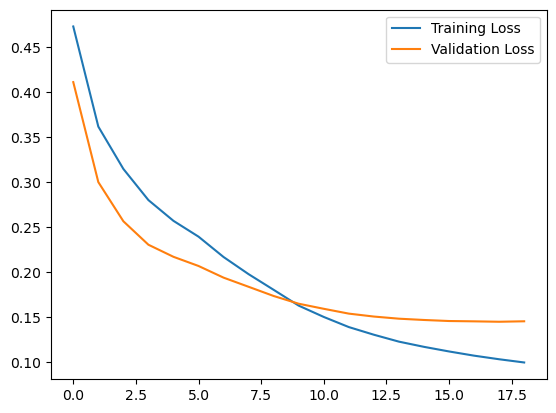

In [29]:
#5.2
test_outputs = model(test_inputs).squeeze()
test_loss = criterion(test_outputs, test_targets)
test_acc = ((test_outputs > 0.5).float() == test_targets).float().mean()

print(f"Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.5f}")

plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.legend()
plt.show() 

In [30]:
from sklearn.metrics import f1_score as f1, accuracy_score as acc, recall_score as rec, precision_score as prec

train_f1 = f1(train_targets, train_predictions)
train_acc = acc(train_targets, train_predictions)
train_recall = rec(train_targets, train_predictions)
train_precision = prec(train_targets, train_predictions)

test_f1 = f1(test_targets, test_predictions)
test_acc = acc(test_targets, test_predictions)
test_recall = rec(test_targets, test_predictions)
test_precision = prec(test_targets, test_predictions)

val_f1 = f1(val_targets, val_predictions)
val_acc = acc(val_targets, val_predictions)
val_recall = rec(val_targets, val_predictions)
val_precision = prec(val_targets, val_predictions)

print("Training set:")
print(f"F1 score: {train_f1:.5f} | Accuracy: {train_acc:.5f} | Recall: {train_recall:.5f} | Precision: {train_precision:.5f}")
print("Test set:")
print(f"F1 score: {test_f1:.5f} | Accuracy: {test_acc:.5f} | Recall: {test_recall:.5f} | Precision: {test_precision:.5f}")
print("Validation set:")
print(f"F1 score: {val_f1:.5f} | Accuracy: {val_acc:.5f} | Recall: {val_recall:.5f} | Precision: {val_precision:.5f}")

Training set:
F1 score: 0.97180 | Accuracy: 0.97204 | Recall: 0.97731 | Precision: 0.96635
Test set:
F1 score: 0.95251 | Accuracy: 0.95337 | Recall: 0.93041 | Precision: 0.97568
Validation set:
F1 score: 0.94937 | Accuracy: 0.94904 | Recall: 0.96154 | Precision: 0.93750
